In [59]:
import numpy as np
import pandas as ps

x = np.zeros(10)
for i in range(10):
    x[i] = 1910 + 10*i
y = [92228496, 106021537, 123202624, 132164569, 151325798, 179323175, 203211926, 226545805, 248709873, 281421906]
n = len(x)

Ньютон

In [47]:
array = np.zeros((2*n-1,n+1))
for i in range(0,2*n-1,2):
    array[i][0] = x[int(i/2)]
    array[i][1] = y[int(i/2)]
    
for i in range(1, 2*n-2):
    for j in range(2,n+1):
        if ((i - (j-1) < 0) | (i + (j-1) > 2*n-2)):
            array[i][j] = 0
        else:
            if ((array[i-(j-1)][0] - array[i+(j-1)][0]) == 0):
                array[i][j] = 0
            else:
                array[i][j] = (array[i-1][j-1] - array[i+1][j-1])/(array[i-j+1][0] - array[i+j-1][0])
ps.DataFrame(data=array, index=np.arange(0,2*n-1), columns=np.arange(0,n+1))                

,0,1,2,3,4,5,6,7,8,9,10
0,1910.0,92228496.0,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1,0.0,0.0,1379304.1,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
2,1920.0,106021537.0,0.0,-68965.205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
3,0.0,0.0,1718108.7,0.000,2298.840167,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
4,1930.0,123202624.0,0.0,-85905.435,0.000000,-57.471004,0.000000,0.000000,0.000000,0.000000,0.000000e+00
5,0.0,0.0,896194.5,0.000,2863.514500,0.000000,1.149420,0.000000,0.000000,0.000000,0.000000e+00
6,1940.0,132164569.0,0.0,-44809.725,0.000000,-71.587862,0.000000,-0.019157,0.000000,0.000000,0.000000e+00
7,0.0,0.0,1916122.9,0.000,1493.657500,0.000000,1.431757,0.000000,0.000274,0.000000,0.000000e+00
8,1950.0,151325798.0,0.0,-95806.145,0.000000,-37.341437,0.000000,-0.023863,0.000000,-0.000003,0.000000e+00
9,0.0,0.0,2799737.7,0.000,3193.538167,0.000000,0.746829,0.000000,0.000341,0.000000,3.800992e-08


In [50]:
def function(year):
    auxiliary_array1 = [1]    
    auxiliary_array2 = [array[0][1]] 
    for i in range(1, n):
        auxiliary_array1.append(auxiliary_array1[i-1]*(year - x[i-1])) #   [1, (x - x0), (x - x0)(x - x1), ... ]
        auxiliary_array2.append(array[i][i+1]) #  [f0, f01, f012, ...]
    population = np.dot(auxiliary_array1, auxiliary_array2)
    return population

In [12]:
function(2010) # 308 745 538 

119814578.00000095

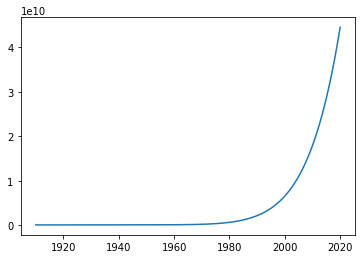

In [44]:
x1 = np.linspace(1910,2020,500)
y1 = np.interp(x, x, y)
for i in range(len(x)):
    y.append(function(x[i]))
import matplotlib.pyplot as plt
plt.plot(x,y)


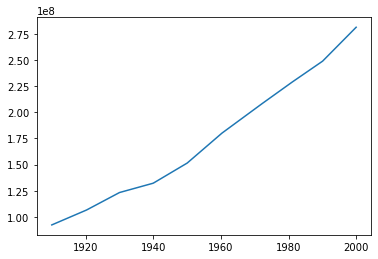

In [60]:
x1 = np.linspace(1910,2000,500)
y1 = np.interp(x1, x, y)
import matplotlib.pyplot as plt
plt.plot(x1,y1)

Сплайны

In [68]:
def interp0late(a, b, c, d, x, n, x_star):
    splines_array = np.zeros(n)
    j = 0
    y_star = 0
    for i in range(1,n):
        splines_array[i] = a[i] + b[i]*(x_star-x[i]) + c[i]*(x_star-x[i])**2 + d[i]*(x_star-x[i])**3
    while j < n-1:
        if (x[j] <= x_star) & (x_star < x[j+1]) :
            y_star = splines_array[j]
            j = n + 1
        else:
            j += 1
    return y_star

tau = 10
u = np.zeros(n)
for i in range(1,n):
    u[i] = (y[i] - y[i-1])/tau
    
p = np.zeros(n)
p[1] = -tau/(4*tau)
for i in range(3,n):
    p[i-1] = -tau/(4*tau + tau*p[i-2])
        
q = np.zeros(n)
q[1] = 3*(u[2]-u[1])/(4*tau)
for i in range(3,n):
    q[i-1] = (3*u[i] - 3*u[i-1] - tau*q[i-2])/(4*tau + tau*q[i-2])
    
c = np.zeros(n)
for i in reversed(range(2,n)):
    c[-(i-1)] = p[-(i-1)] + q[-(i-1)]
    
b = np.zeros(n)
for i in range(1,n):
    b[i] = u[i] + (2*c[i]*tau + tau*c[i-1])/3
    
    
d = np.zeros(n)
for i in range(1,n):
    d[i] = (c[i] - c[i-1])/(3*tau)

a = np.zeros(n)
for i in range(1,n):
    a[i] = y[i]
        
answer_array = np.zeros((3,10))
answer_array[0][:] = x
answer_array[1][:] = y
for i in range(10):
    answer_array[2][i] = interp0late(a,b,c,d,x,n,answer_array[0][i])
ps.DataFrame(data=answer_array, index=np.arange(0,3), columns=np.arange(0,n)) 

,0,1,2,3,4,5,6,7,8,9
0,1910.0,1920.0,1930.0,1940.0,1950.0,1960.0,1970.0,1980.0,1990.0,2000.0
1,92228496.0,106021537.0,123202624.0,132164569.0,151325798.0,179323175.0,203211926.0,226545805.0,248709873.0,281421906.0
2,0.0,106021537.0,123202624.0,132164569.0,151325798.0,179323175.0,203211926.0,226545805.0,248709873.0,0.0
